<a href="https://colab.research.google.com/github/Rishavrajprasad/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
# Removing fractional part of Rate


def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

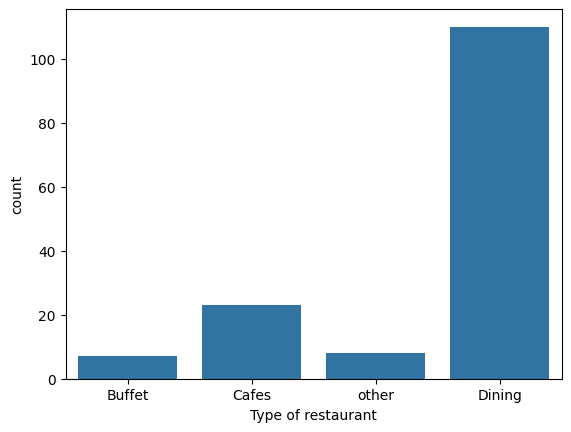

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

It is observed that majority of the restaurants fall into dining category

Text(0, 0.5, 'No. of people prefers')

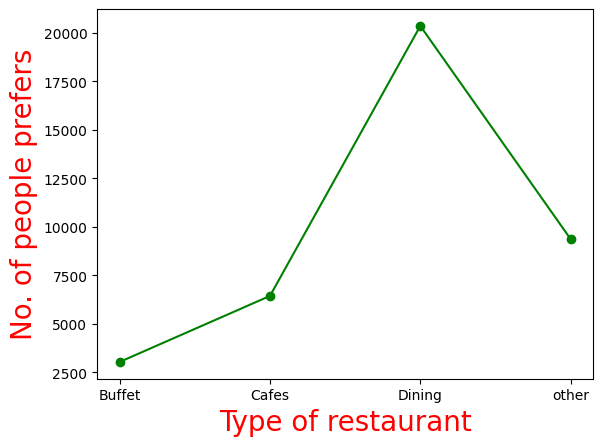

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("No. of people prefers", c="red", size=20)

Most number of people prefers dining restaurants

In [ ]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

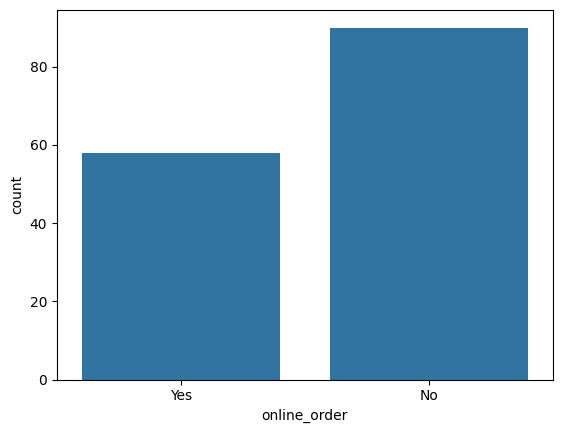

In [ ]:
sns.countplot(x=dataframe['online_order'])


Majority of Restaurants do not offers online orders

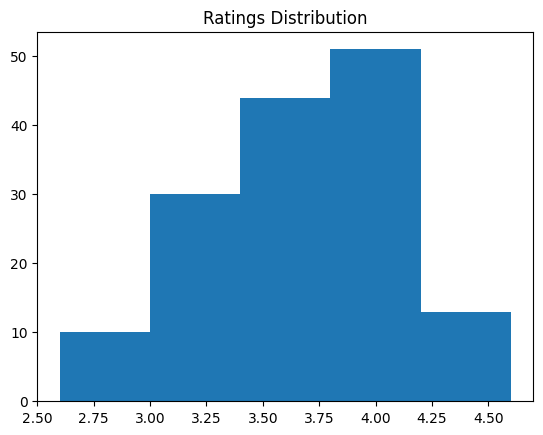

In [ ]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()


The average rating of restaurants is between 3.5 to 3.75

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

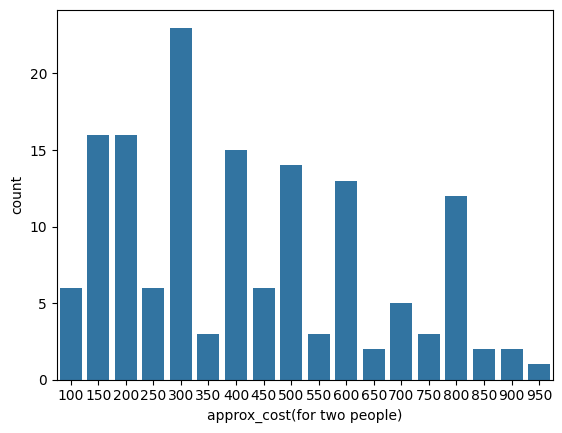

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


From the graph it is clear that majority of couples prefer restaurants with average price of 300

<Axes: xlabel='online_order', ylabel='rate'>

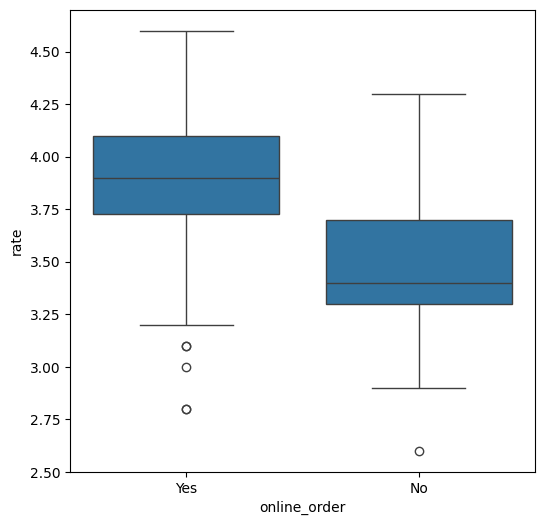

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.